In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

dir = '/home/joe/data/jhu/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

dataConfirmed = dir + 'time_series_19-covid-Confirmed.csv'
dataDeaths = dir + 'time_series_19-covid-Deaths.csv'
dataRecovered = dir + 'time_series_19-covid-Recovered.csv'

dfConfirmed = pd.read_csv(dataConfirmed)
dfDeaths = pd.read_csv(dataDeaths)
dfRecovered = pd.read_csv(dataRecovered)
dfConfirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [116]:
dfC = dfConfirmed.drop(['Province/State','Lat','Long'],axis=1)
dfC.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,53,59,70,75,82,114,147,177,212,272
1,Japan,2,1,2,2,4,4,7,7,11,...,581,639,639,701,773,839,825,878,889,924
2,Singapore,0,1,3,3,4,5,7,7,10,...,160,178,178,200,212,226,243,266,313,345
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,129,149,149,197,238,428,566,673,790,900


In [117]:
dfC = dfC.set_index('Country/Region').T
dfC = dfC.reset_index()
dfC.head()

Country/Region,index,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,...,"Gambia, The",United Kingdom,"Bahamas, The",Denmark,France,United Kingdom,Chad,El Salvador,Fiji,Nicaragua
0,1/22/20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,3,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,5,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,7,2,3,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,8,4,4,1,4,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
dfC = dfC.rename(columns={"index": 'date'})
dfC.head()

Country/Region,date,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,...,"Gambia, The",United Kingdom,"Bahamas, The",Denmark,France,United Kingdom,Chad,El Salvador,Fiji,Nicaragua
0,1/22/20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,3,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,5,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,7,2,3,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,8,4,4,1,4,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


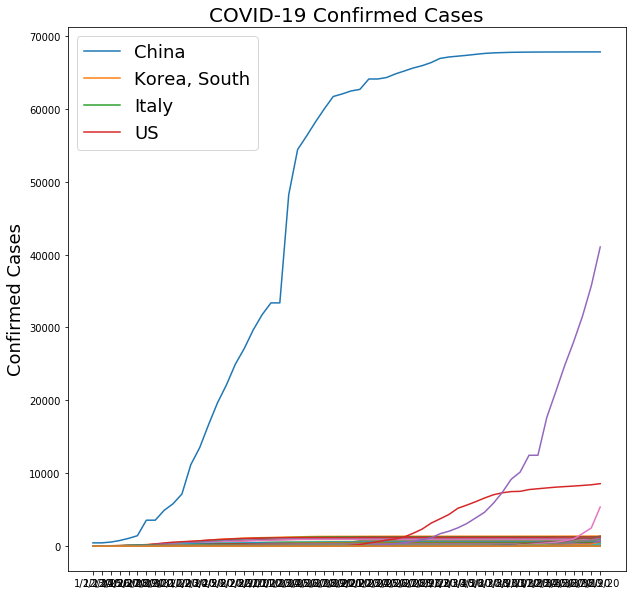

In [131]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.set_title("COVID-19 Confirmed Cases", fontsize=20)
ax1.set_ylabel('Confirmed Cases', color='black',fontsize=18)
plt.plot(dfC['date'],dfC['China'])
plt.plot(dfC['date'],dfC['Korea, South'])
plt.plot(dfC['date'],dfC['Italy'])
plt.plot(dfC['date'],dfC['US'])
plt.legend(['China','Korea, South', "Italy", "US"], fontsize=18)